### $\color{royalblue}{\text{ Трећа вјежба из нумеричких метода у астрономији, датум: 18.12.2025.}} $

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import  math
import random

#### $\color{magenta}{\text{ИНТЕРПОЛАЦИЈА - уводни дио.}} $

Уколико тражимо функцију која добро апроксимира неку другу функцију $f$ (која је сложена за израчунавања, или просто

није добро одређена у неким тачкама) која је реална и глатка, то можемо учинити полиномом.



На интервалу $[a,b]$ бирамо $n+1$ различитих тачака које називамо **чворови интерполације** ($x_0,x_1,...,x_n$).

Потом конструишемо полином реда не већег од $n$:

$$
P(x)=a_0x^n+a_1x^{n-1}+...+a_{n-1}x+a_n.
$$

У чворовима интерполације важи $P(x)=f(x)$. Такође, полином је погодан ако је $|P(x)-f(x)|<\varepsilon$.

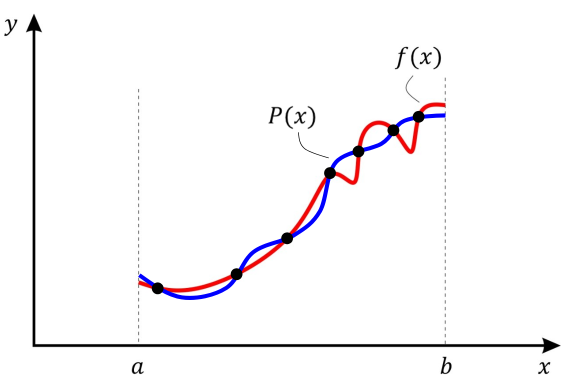

#### $\color{magenta}{\text{Коначне разлике.}} $

In [31]:
a = np.round(np.random.random(10)*100)
print('a = ',a)

a =  [ 61.  27.  25.  66.   1.   9.  65.  53. 100.  63.]


Ручним методом правимо низ низова нула.

In [32]:
razlike = []
red = len(a)-1

for i in range(0, red):
    razlike.append(np.zeros(red-i))

razlike

[array([0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0.]),
 array([0., 0., 0.]),
 array([0., 0.]),
 array([0.])]

Попуњавамо низове коначним разликама.

In [33]:
a1 = a    

for i in range(0, red):
    for j in range(0, red-i):
        razlike[i][j] = a1[j+1] - a1[j]
        
    a1=razlike[i]
    
razlike

[array([-34.,  -2.,  41., -65.,   8.,  56., -12.,  47., -37.]),
 array([  32.,   43., -106.,   73.,   48.,  -68.,   59.,  -84.]),
 array([  11., -149.,  179.,  -25., -116.,  127., -143.]),
 array([-160.,  328., -204.,  -91.,  243., -270.]),
 array([ 488., -532.,  113.,  334., -513.]),
 array([-1020.,   645.,   221.,  -847.]),
 array([ 1665.,  -424., -1068.]),
 array([-2089.,  -644.]),
 array([1445.])]

Алтернатива је попунити низове коначним разликама преко np.diff.

In [34]:
a1 = a
for i in range(len(razlike)):
    razlike[i] = np.diff(a1)
    a1 = razlike[i]
    
razlike

[array([-34.,  -2.,  41., -65.,   8.,  56., -12.,  47., -37.]),
 array([  32.,   43., -106.,   73.,   48.,  -68.,   59.,  -84.]),
 array([  11., -149.,  179.,  -25., -116.,  127., -143.]),
 array([-160.,  328., -204.,  -91.,  243., -270.]),
 array([ 488., -532.,  113.,  334., -513.]),
 array([-1020.,   645.,   221.,  -847.]),
 array([ 1665.,  -424., -1068.]),
 array([-2089.,  -644.]),
 array([1445.])]

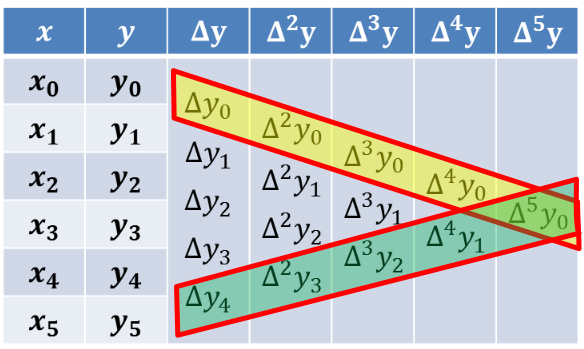

У табели изнад су дате силазне и узлазне коначне разлике. Важе сљедеће једнакости:

$$
\Delta y_0=y_1-y_0,\,...,\,\Delta y_{n-1}=y_n-y_{n-1},
$$

$$
\Delta^2y_0=\Delta y_1-\Delta y_0,\,...,\,\Delta^2y_{n-2}=\Delta y_{n-1}-\Delta y_{n-2},
$$

$$
\Delta^3y_0=\Delta^2y_1-\Delta^2y_0,\,...,\,\Delta^3y_{n-3}=\Delta^2y_{n-2}-\Delta^2y_{n-3},
$$

$$
\dddot{}
$$

$$
\Delta^ny_0=\Delta^{n-1}y_1-\Delta^{n-1}y_0.
$$
---


**Силазне разлике**.

In [35]:
silazne_razlike = []
for i in range(len(razlike)):
    silazne_razlike.append(razlike[i][0])

silazne_razlike

[-34.0, 32.0, 11.0, -160.0, 488.0, -1020.0, 1665.0, -2089.0, 1445.0]

**Узлазне разлике**.

In [36]:
uzlazne_razlike = []
for i in range(len(razlike)):
    uzlazne_razlike.append(razlike[i][-1])
    
uzlazne_razlike

[-37.0, -84.0, -143.0, -270.0, -513.0, -847.0, -1068.0, -644.0, 1445.0]

**Средишње разлике**.

In [37]:
sredisnje_razlike = []

for i in range(len(razlike)):
    if np.mod(len(razlike[i]), 2)==1:
        i1 = int(len(razlike[i])/2)
        sredisnje_razlike.append(razlike[i][i1])
    else:
        i1 = int(len(razlike[i])/2 - 1)
        sredisnje_razlike.append((razlike[i][i1] + razlike[i][i1+1])/2)
        
sredisnje_razlike

[8.0, 60.5, -25.0, -147.5, 113.0, 433.0, -424.0, -1366.5, 1445.0]

Све ове разлике ће нам требати за интерполационе полиноме, па ћемо их мало "генерализовати".

In [38]:
def silazne_razlike(y):
    red = len(y)-1 
    razlike = []
    for i in range(0, red):
        razlike.append(np.zeros(red-i))
        
    y1 = y    
    for i in range(0, red):
        for j in range(0, red-i):
            razlike[i][j] = y1[j+1]-y1[j]
            
        y1 = razlike[i]

    silazne=[]    
    for i in range(0, red):
        silazne.append(razlike[i][0])

    return silazne

############################################################################################################
############################################################################################################

def uzlazne_razlike(y):
    
    red = len(y)-1 
    razlike = []
    for i in range(0, red):
        razlike.append(np.zeros(red-i))
        
    y1 = y    
    for i in range(0, red):
        for j in range(0, red-i):
            razlike[i][j] = y1[j+1]-y1[j]
            
        y1 = razlike[i]

    uzlazne=[]
  
    for i in range(0, red):
        uzlazne.append(razlike[i][len(razlike[i])-1])
        
    return  uzlazne

############################################################################################################
############################################################################################################

def sredisnje_razlike(y):

    red = len(y)-1 
    razlike = []
    for i in range(0, red):
        razlike.append(np.zeros(red-i))
        
    y1 = y    
    for i in range(0, red):
        for j in range(0, red-i):
            razlike[i][j] = y1[j+1]-y1[j]
            
        y1 = razlike[i]

    sredisnje=[]
    
    for i in range(0,red):
        
        if red % 2 == 0: 
            if i % 2 !=0:
                sredisnje.append(razlike[i][int(np.ceil((len(razlike[i]))/2.)) - 1])
            else:
                sredisnje.append(np.mean([razlike[i][int(len(razlike[i])/2) - 1], 
                                          razlike[i][int(len(razlike[i])/2)]]))
                
        else:
            if i % 2 !=0:
                sredisnje.append(np.mean([razlike[i][int(int(len(razlike[i])/2)) - 1], 
                                          razlike[i][int(int(len(razlike[i])/2))]]))
            else:
                sredisnje.append(razlike[i][int(np.ceil((len(razlike[i]))/2.)) - 1])       

    return sredisnje


---

Припрема за $\color{magenta}{\text{интерполацију}} $ - радићемо са подацима за хелиоцентрично растојање Сатурна.

In [39]:
t, x, y, z = np.loadtxt('Saturn.dat', skiprows=2, delimiter=',', unpack=True)
print(len(t), len(x), len(y), len(z))

t = t[0::10]
x = x[0::10]
y = y[0::10]
z = z[0::10]

r = np.sqrt(x**2+y**2+z**2)
print(len(t))

537 537 537 537
54



#### $\color{magenta}{\text{Њутнов полином прве врсте}} $ (са **силазним** разликама) за интерполацију на почетку таблице. 

$$
P(x)=y_0+ \frac{t}{1!} \Delta y_0 + \frac{t(t-1)}{2!}\Delta^2 y_0 + ... + \frac{t(t-1) ... (t-n+1)}{n!} \Delta^n y_0,
$$

$$
t=\frac{x-x_0}{h},\,h=x_1-x_0=...=x_n-x_{n-1},\,\text{h - еквидистантни корак}.
$$ 


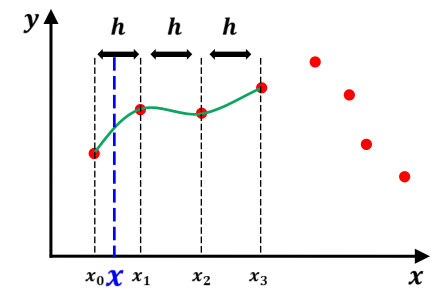

In [40]:
def njutn_1(x,y,x0):
    
#==============================================================================
#     интерполација Њутновим полиномом прве врсте
#==============================================================================
#     x, y - чворови интерполације
#     x0 - аргументи за које се врши интерполација
#==============================================================================

    silazne = silazne_razlike(y)
    h = x[1]-x[0] 
    P = y[0]
    cinilac = 1
    for i in range(0, len(y)-1):
        cinilac = cinilac*(x0-x[i])
        P = P+silazne[i]/math.factorial(i+1)*cinilac/h**(i+1)
        
    return P

Тражено растојање је:  9.411 АЈ


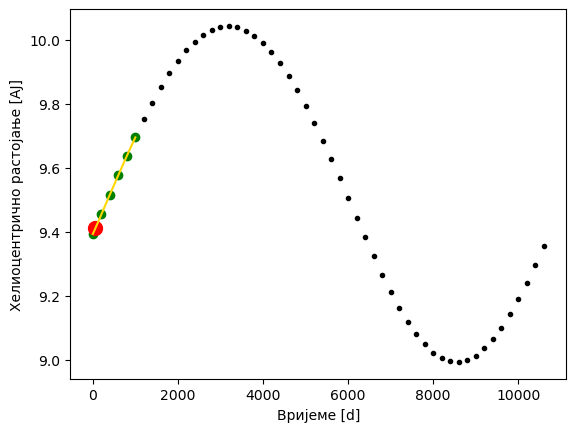

In [41]:
t0 = 59

red = 5
indeks = np.argwhere(t<t0).flatten()[-1]

r0 =  njutn_1(t[indeks:indeks+red+1], r[indeks:indeks+red+1], t0)

print('Тражено растојање је: ', np.round(r0, 3), 'АЈ')
xx = np.linspace(t[indeks], t[indeks+red], 100)
yy = njutn_1(t[indeks:indeks+red+1], r[indeks:indeks+red+1], xx)

plt.plot(t, r, '.', color='black')
plt.plot(t[indeks:indeks+red+1], r[indeks:indeks+red+1], 'o', color='green')
plt.plot(t0, r0, 'o', color='red', markersize=10)
plt.plot(xx, yy, color='gold')
plt.xlabel('Вријеме [d]')
plt.ylabel('Хелиоцентрично растојање [AJ]')
plt.show()

#### $\color{magenta}{\text{Њутнов полином друге врсте}} $ (са **узлазним** разликама) за интерполацију на крају таблице. 

$$
P(x)=y_n+ \frac{t}{1!} \Delta y_{n-1} + \frac{t(t+1)}{2!}\Delta^2 y_{n-2} + ... + \frac{t(t+1) ... (t+n-1)}{n!} \Delta^n y_0,
$$
    
$$
t=\frac{x-x_n}{h},\,h=x_1-x_0=...=x_n-x_{n-1},\,\text{h - еквидистантни корак}.
$$

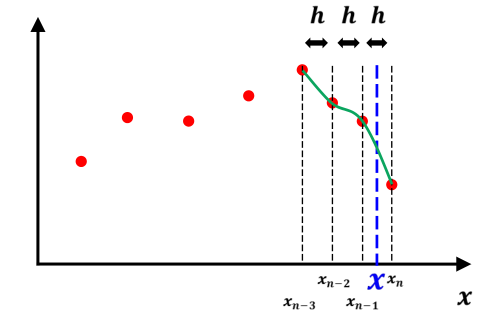

In [42]:
def njutn_2(x,y,x0):
    
#==============================================================================
#     интерполација Њутновим полиномом друге врсте
#==============================================================================
#     x, y - чворови интерполације
#==============================================================================

    uzlazne = uzlazne_razlike(y)
    h = x[1]-x[0] 
    P = y[-1]
    cinilac = 1
    for i in range(0, len(y)-1):
        cinilac = cinilac*(x0-x[-1-i])
        P = P+uzlazne[i]/math.factorial(i+1)*cinilac/h**(i+1)
        
    return P

Тражено растојање је:  9.013 АЈ


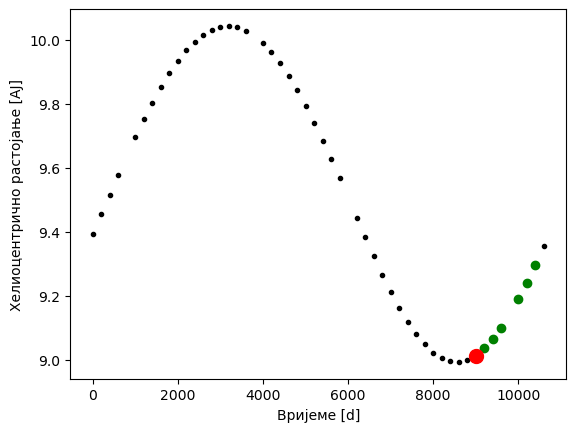

In [50]:
t0 = 9000

red = 5
indeks=np.argwhere(t>t0).flatten()[0]

r0 = njutn_2(t[indeks-red:indeks+1], r[indeks-red:indeks+1], t0)
print('Тражено растојање је: ', np.round(r0, 3), 'АЈ')

xx = np.linspace(t[indeks-red:indeks+1], t[indeks-red:indeks+1], 100)
yy = njutn_2(t[indeks-red:indeks+1], r[indeks-red:indeks+1], xx)

# plt.plot(xx, yy, color='gold')
plt.plot(t, r, '.', color='black')
plt.plot(t[indeks:indeks+red+1], r[indeks:indeks+red+1], 'o', color='green')
plt.plot(t0, r0, 'o', color='red', markersize=10)
plt.xlabel('Вријеме [d]')
plt.ylabel('Хелиоцентрично растојање [AJ]')
plt.show()

**Подсјетник**: Њутнови интерполациони полиноми се користе за интерполацију на крајевима таблице. 

Могу се примјењивати само на еквидистантним подацима! Приликом додавања интерполационих чворова, 

Њутнове полиноме није потребно рачунати испочетка већ су потребни минимални додатни израчуни. 

Дакле, одличан су избор за коришћење ако није унапријед познат број интерполационих чворова.


---

Функција $y=f(x)$ је задата вриједностима $y_i=f(x_i)$ у $2n+1$ еквидистантних чворова ($x_0,x_{\pm1},...,x_{\pm n}$).

Коришћењем средишњих разлика, дефинишемо први и други **Гаусов интерполациони полином** (да потврдимо, $t=\frac{x-x_0}{h}$).

$\color{magenta}{\text{Први Гаусов}} $ полином (црвена боја у табели) јесте облика:

$$
P(x)=y_0+t\Delta y_0+\frac{t(t-1)}{2!}\Delta^2y_{-1}+\frac{t(t-1)(t+1)}{3!}\Delta^3y_{-1}+\frac{t(t-1)(t+1)(t-2)}{4!}\Delta^4y_{-2}+...
$$

Он се још назива и интерполациони полином за интерполацију унапријед (добије се вриједност функције која је мало већа од стварне вриједности).

$\color{magenta}{\text{Други Гаусов}} $ полином (црна боја у табели) се пише као:
$$
P(x)=y_0+t\Delta y_{-1}+\frac{t(t+1)}{2!}\Delta^2y_{-1}+\frac{t(t-1)(t+1)}{3!}\Delta^3y_{-2}+\frac{t(t-1)(t+1)(t+2)}{4!}\Delta^4y_{-2}+...
$$

Он се још назива и интерполациони полином за интерполацију уназад (добије се вриједност функције која је мало мања од стварне вриједности).

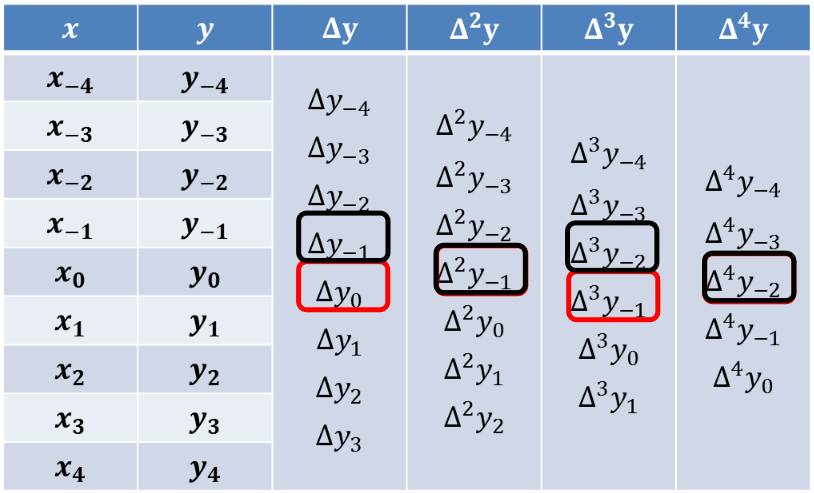

#### $\color{magenta}{\text{Стирлингов полином}} $.

Уколико се узме аритметичка средина прве и друге Гаусове интерполационе формуле, добија се Стирлингова формула:

$$
p(x)=y_0+t\frac{\Delta y_{-1}+\Delta y_0}{2}+\frac{t^2}{2}\Delta^2y_{-1}+\frac{t(t-1)(t+1)}{3!}\frac{\Delta^3y_{-2}+\Delta^3y_{-1}}{2}+\frac{t^2(t-1)(t+1)}{4!}\Delta^4y_{-2}+...$$

$$
...+\frac{t(t-1)(t+1)...(t-(n-1))(t+(n-1))}{(2n-1)!}\frac{\Delta^{2n-1}y_{-n}+\Delta^{2n-1}y_{-(n-1)}}{2}+\frac{t^2(t-1)(t+1)...(t-(n-1))(t+(n-1))}{(2n)!}\Delta^{2n}y_{-n}.
$$

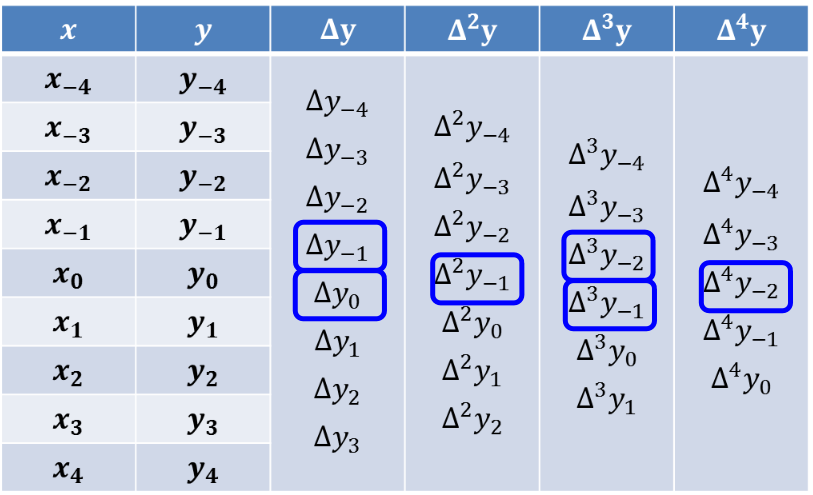

In [44]:
def stirling(x, y, x0, red):
    
#==============================================================================
#     интерполација Стирлинговим полиномом
#==============================================================================
#     x, y - чворови интерполације
#     x0 - аргументи за које се врши интерполација
#==============================================================================
    
    if np.mod(red, 2)!=0:
        print('Стирлингов полином мора бити парног реда!')
        exit()
     
    h=x[1]-x[0] 
   
    indeks=np.argwhere(x<x0)[-1][0] 

    q = (x0-x[indeks])/h
    if q>=0.5:
        x = x[indeks-int(red/2)+1:indeks+int(red/2)+2]
        y = y[indeks-int(red/2)+1:indeks+int(red/2)+2]
    else:
        x = x[indeks-int(red/2):indeks+int(red/2)+1]
        y = y[indeks-int(red/2):indeks+int(red/2)+1]
    
    sredisnje = sredisnje_razlike(y)

    P = y[int(np.floor(len(x)/2))] 
    q = (x0-x[int(np.floor(len(x)/2))])/h
    q_parno = 1
        
    for i in range(1, int((len(x)+1)/2)):
        q_parno = q_parno*(q**2-(i-1)**2)
            
        if i==1:
            q_neparno = q
        else:
            q_neparno = q_neparno*(q**2-(i-1)**2)
                      
        P = P+q_neparno/math.factorial(2*i-1)*sredisnje[2*i-2]
        P = P+q_parno/math.factorial(2*i)*sredisnje[2*i-1]
            
    return P, x, y

Тражено растојање је:  10.032 АЈ


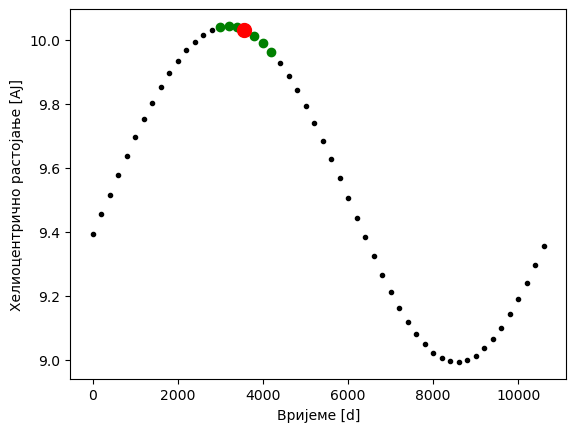

In [45]:
t0 = 3550.543
r0, x0, y0 = stirling(t, r, t0, red=6)
print('Тражено растојање је: ', np.round(r0, 3), 'АЈ')

plt.plot(t, r, '.', color='black') # сви чворови
plt.plot(x0,y0,'o', color='green') # само они чворови који су коришћени за интерполацију
plt.plot(t0, r0, 'o', color='red', markersize=10)
plt.xlabel('Вријеме [d]')
plt.ylabel('Хелиоцентрично растојање [AJ]')
plt.show()

#### $\color{magenta}{\text{Беселов полином}} $.

Беселова интерполациона формула добија се из другог Гаусовог обрасца. Функција $y=f(x)$ је сада задата на $2n+2$ eквидистантна чвора.

Узимају се $x_0,y_0$ и $x_1,y_1$ за почетне вриједности. Аритметичка средина даје Беселову формулу:

$$
p(x)=\frac{y_0+y_1}{2}+(t-\frac{1}{2})\Delta y_0+\frac{t(t-1)}{2}\frac{\Delta^2y_{-1}+\Delta^2y_0}{2!}+\frac{t(t-\frac{1}{2})(t-1)}{3!}\Delta^3y_{-1}+...$$

$$
...+\frac{(t-\frac{1}{2})t(t-1)(t+1)...(t-(n-1))(t+(n-1))(t-n)}{(2n+1)!}\Delta^{2n+1}y_{-n}.
$$



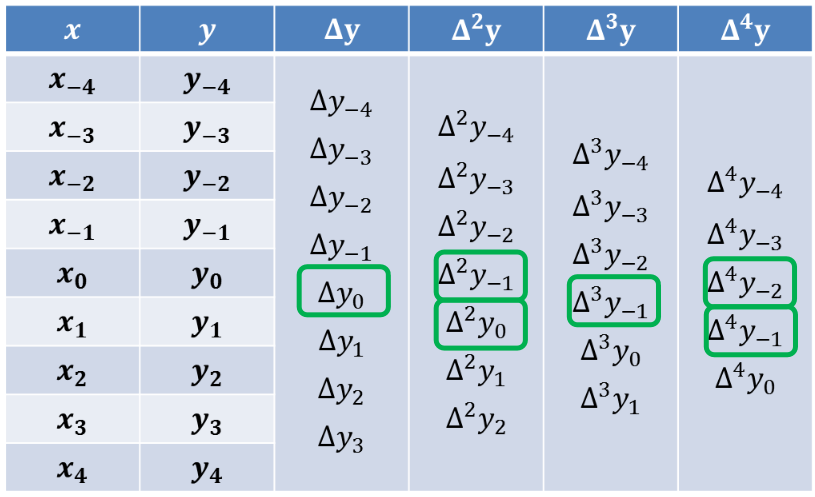

In [46]:
def besel(x, y, x0, red):
    
#==============================================================================
#     интерполација Беселовим полиномом
#==============================================================================
#     x, y - чворови интерполације
#     x0 - аргументи за које се врши интерполација
#==============================================================================

    if np.mod(red, 2)==0:
        print('Беселов полином мора бити непарног реда!')
        exit()
        
    h = x[1]-x[0] 
    indeks = np.argwhere(x<x0)[-1][0] 

    x = x[indeks-int(red/2):indeks+int(red/2)+2]
    y = y[indeks-int(red/2):indeks+int(red/2)+2]

    sredisnje = sredisnje_razlike(y)

    P = 0
    sredisnje = [(y[int(len(y)/2)-1]+y[int(len(y)/2)])/2.]+sredisnje
    q = (x0-x[int(len(x)/2)-1])/h
    qq = 1
    
   
    for i in range (0, int(len(x)/2)):

        if i==0: 
            q_parno = 1
            q_neparno = q-0.5
        elif i==1:
            q_parno = q*(q-1)
            q_neparno = q*(q-1)*(q-0.5)
        else:   
            qq = qq*(q**2-(i-1)**2)
            q_parno = q*(q-i)*qq
            q_neparno = q*(q-i)*(q-0.5)*qq
            
        P = P+q_parno/math.factorial(2*i)*sredisnje[2*i]
        P = P+q_neparno/math.factorial(2*i+1)*sredisnje[2*i+1]

    return P,  x, y

Тражено растојање је:  9.731 АЈ


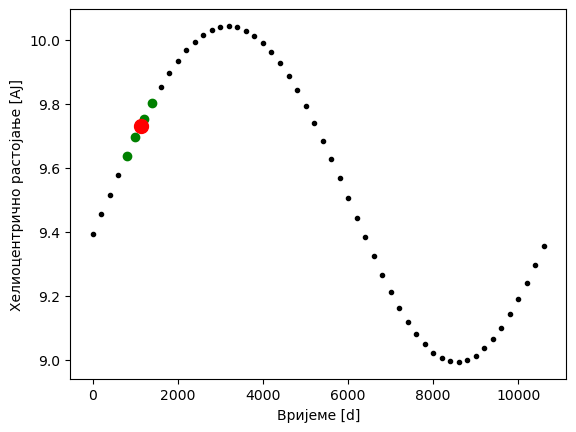

In [47]:
t0 = 1126.543
r0, x0, y0 = besel(t, r, t0, red=3)
print('Тражено растојање је: ', np.round(r0, 3), 'АЈ')

plt.plot(t, r, '.', color='black') # сви чворови
plt.plot(x0,y0,'o', color='green') # само они чворови који су коришћени за интерполацију
plt.plot(t0, r0, 'o', color='red', markersize=10)
plt.xlabel('Вријеме [d]')
plt.ylabel('Хелиоцентрично растојање [AJ]')
plt.show()

**Подсјетник**: Стирлингов и Беселов полином користе средишње разлике. Уколико је $|t|\leq0.25$, користи се Стирлингов полином,

а уколико важи $0.25\leq t\leq0.75$, користи се Беселов полином.



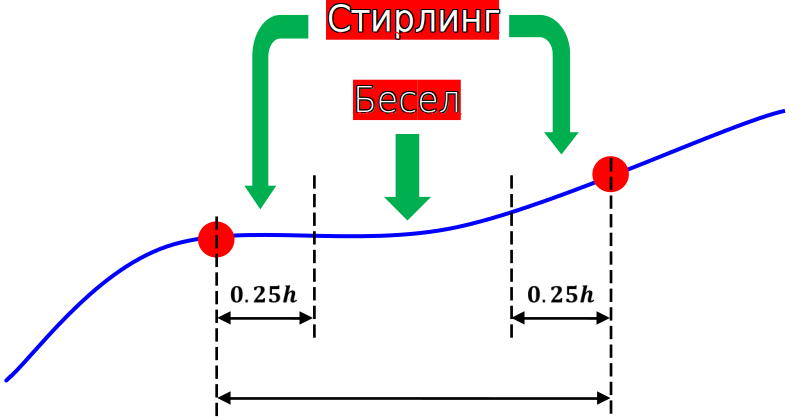

#### $\color{magenta}{\text{Лагранжов полином}} $ за нееквидистантне аргументе.

$$
L_n(x)=\sum_{i=0}^n f(x_i)\prod_{\substack{j=0 \\ j\ne i}}^n
\frac{x-x_j}{x_i-x_j}.
$$

In [48]:
def lagranz(x, y, x0):
    
#==============================================================================
#     интерполација Лагранжовим полиномом
#==============================================================================
#     x, y - чворови интерполације (np.array)
#     x0 - аргументи за које се врши интерполација (у облику низа)
#==============================================================================

    P = []
    
    for k in range(0, len(x0)):
        xi = x0[k]
        PP = 0
        for i in range(0, len(x)):
            z = np.delete(x, i)
            brojilac = xi-z
            imenilac = x[i]-z
            B = 1
            I = 1
            for j in range(0, len(brojilac)):
                B = B*brojilac[j]
                I = I*imenilac[j]
                
            PP = PP+B/I*y[i]
            
        P.append(PP)
    return P

Тражено растојање је:  9.131 АЈ


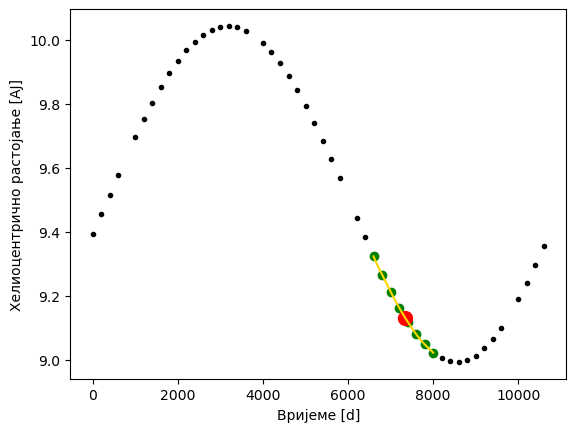

In [49]:
izbor_cvorova = random.sample(range(len(t)), 50) # бирамо насумичних 50 чворова
izbor_cvorova.sort()
t = t[izbor_cvorova]
x = x[izbor_cvorova]
y = y[izbor_cvorova]
z = z[izbor_cvorova]

r = np.sqrt(x**2+y**2+z**2)

t0 = 7342
red = 7
indeks = (np.argwhere(t<t0)).flatten()[-1]

q = (t0-t[indeks])/(t[indeks+1]-t[indeks])

if np.mod(red,2)==1: 
    i1 = indeks-int((red+1)/2)+1
    i2 = indeks+int((red+1)/2)
else:
    if q>=0.5:
        i1=indeks-int((red+1)/2)+1
        i2=indeks+int((red+1)/2)+1
    else:
        i1=indeks-int((red+1)/2)
        i2=indeks+int((red+1)/2)
        

plt.plot(t, r, '.', color='black') # сви чворови
plt.plot(t[i1:i2+1], r[i1:i2+1], 'o', color='green') # само они чворови који су коришћени за интерполацију

r0 = lagranz(t[i1:i2+1], r[i1:i2+1],[t0]) # интерполација
print('Тражено растојање је: ', np.round(r0[0], 3), 'АЈ')

plt.plot(t0, r0, 'o', color='red', markersize=10)
tt = np.linspace(t[i1], t[i2], 100) # интерполација на интервалу [i1, i2]
rr0 = lagranz(t[i1:i2+1], r[i1:i2+1], tt)
plt.plot(tt, rr0, color='gold')

plt.xlabel('Вријеме [d]')
plt.ylabel('Хелиоцентрично растојање [AJ]')
plt.show()

**Подсјетник**: Најважнији недостаци Лагранжовог полинома су то што за велико $n$ може много да осцилује (Рунгеов феномен)

између чворова и што је приликом додавања / одузимања чворова потребно поновно израчунавање читавог полинома.


### $\color{green}{\text{ЗАДАЦИ:}} $

<hr style="border: none; height: 2px; background-color: green; opacity: 0.5;" />

1. Дата је мрежа надморских висина на површини Марса. Кораци између тачака по латитуди и лонгитуди су униформни,

па је мрежа равномјерно распоређена. Одредити надморску висину за произвољну лонгитуду на Марсу користећи 

произвољни интерполациони полином. 

<hr style="border: none; height: 2px; background-color: green; opacity: 0.5;" />